# Predict Nighttime Light Intensities from Daytime Light 

First pass.  
Current Goal: Use CNN to extract features from daytime lights (Landsat) data and predict levels of nighhtime light intensities (VIIRS).
***
General Steps:
- Import the data
- Feature creation
- Build the Neural Net
- Evaluate the Neural Net

In [41]:
import os
import numpy as np
import pandas as pd
#from osgeo import gdal
import rasterio

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

# Import the data

daytime image shape: (7, 167, 167)


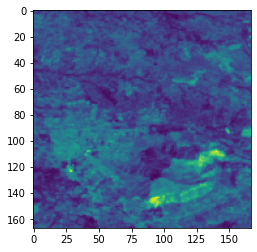

In [71]:
#Load single daytime tif file (one observation)
os.chdir("/Users/nguyenluong/wb_internship/Data/satellite_raw")
filepath_day = 'Landsat/2011/stacked/1.tif'
data_day = rasterio.open(filepath_day)
array_day = data_day.read()
print('daytime image shape: {}'.format(array_day.shape))
plt.imshow(data_day.read(1));

In [72]:
def read_geotiff(filepath):
    '''
    Reads in geotiffs appropriately using rasterio and convert into an array.
    
    Inputs:
        filepath (str)
    Returns:
        (numpy.ndarray) array of arrays where each array represents a band
    '''
    data = rasterio.open(filepath)
    return data.read()


def get_daytime_data(geotiff_source, year, stacked_status):
    '''
    Cycles through all geotiffs in a folder, reads them, adds them to a list.
    
    Inputs:
        directory (str)
    Returns:
        (list) list of arrary where each array represents a geotiff
    '''
    all_data = []
    directory = os.path.join(geotiff_source, year, stacked_status)
    for filename in os.listdir(directory):
        if filename.endswith(".tif"):
            filepath = os.path.join(directory, filename)
            print(filepath)
            geotiff_array = read_geotiff(filepath)
            all_data.append(geotiff_array)
    return all_data

In [74]:
#Define years for daytime data
Landsat_years = ['2011', '2013', '2014', '2016']

#Load in all daytime data
all_daytime_data = []
for year in Landsat_years:
    all_daytime_data.append((year, get_daytime_data('Landsat', year, 'stacked')))

Landsat/2011/stacked/3087.tif
Landsat/2011/stacked/2399.tif
Landsat/2011/stacked/3939.tif
Landsat/2011/stacked/476.tif
Landsat/2011/stacked/3093.tif
Landsat/2011/stacked/4924.tif
Landsat/2011/stacked/1874.tif
Landsat/2011/stacked/4059.tif
Landsat/2011/stacked/5347.tif
Landsat/2011/stacked/2414.tif
Landsat/2011/stacked/106.tif
Landsat/2011/stacked/1486.tif
Landsat/2011/stacked/5186.tif
Landsat/2011/stacked/884.tif
Landsat/2011/stacked/1337.tif
Landsat/2011/stacked/2170.tif
Landsat/2011/stacked/4267.tif
Landsat/2011/stacked/714.tif
Landsat/2011/stacked/728.tif
Landsat/2011/stacked/1082.tif
Landsat/2011/stacked/3681.tif
Landsat/2011/stacked/4688.tif
Landsat/2011/stacked/4887.tif
Landsat/2011/stacked/3656.tif
Landsat/2011/stacked/2212.tif
Landsat/2011/stacked/2574.tif
Landsat/2011/stacked/3118.tif
Landsat/2011/stacked/1068.tif
Landsat/2011/stacked/4110.tif
Landsat/2011/stacked/2561.tif
Landsat/2011/stacked/4676.tif
Landsat/2011/stacked/4662.tif
Landsat/2011/stacked/4104.tif
Landsat/2011/st

Landsat/2011/stacked/2288.tif
Landsat/2011/stacked/3196.tif
Landsat/2011/stacked/2511.tif
Landsat/2011/stacked/1030.tif
Landsat/2011/stacked/5257.tif
Landsat/2011/stacked/566.tif
Landsat/2011/stacked/3815.tif
Landsat/2011/stacked/3801.tif
Landsat/2011/stacked/2882.tif
Landsat/2011/stacked/5135.tif
Landsat/2011/stacked/77.tif
Landsat/2011/stacked/2114.tif
Landsat/2011/stacked/4565.tif
Landsat/2011/stacked/1384.tif
Landsat/2011/stacked/88.tif
Landsat/2011/stacked/4997.tif
Landsat/2011/stacked/3034.tif
Landsat/2011/stacked/2464.tif
Landsat/2011/stacked/4015.tif
Landsat/2011/stacked/4773.tif
Landsat/2011/stacked/4001.tif
Landsat/2011/stacked/3785.tif
Landsat/2011/stacked/4954.tif
Landsat/2011/stacked/1838.tif
Landsat/2011/stacked/4798.tif
Landsat/2011/stacked/3977.tif
Landsat/2011/stacked/3787.tif
Landsat/2011/stacked/2466.tif
Landsat/2011/stacked/3750.tif
Landsat/2011/stacked/5321.tif
Landsat/2011/stacked/4981.tif
Landsat/2011/stacked/3591.tif
Landsat/2011/stacked/4573.tif
Landsat/2011/st

Landsat/2011/stacked/5167.tif
Landsat/2011/stacked/25.tif
Landsat/2011/stacked/3489.tif
Landsat/2011/stacked/2032.tif
Landsat/2011/stacked/1936.tif
Landsat/2011/stacked/4696.tif
Landsat/2011/stacked/2595.tif
Landsat/2011/stacked/1711.tif
Landsat/2011/stacked/2218.tif
Landsat/2011/stacked/4655.tif
Landsat/2011/stacked/3884.tif
Landsat/2011/stacked/4641.tif
Landsat/2011/stacked/4654.tif
Landsat/2011/stacked/2543.tif
Landsat/2011/stacked/3852.tif
Landsat/2011/stacked/3846.tif
Landsat/2011/stacked/1260.tif
Landsat/2011/stacked/2769.tif
Landsat/2011/stacked/737.tif
Landsat/2011/stacked/2147.tif
Landsat/2011/stacked/30.tif
Landsat/2011/stacked/2153.tif
Landsat/2011/stacked/3265.tif
Landsat/2011/stacked/1472.tif
Landsat/2011/stacked/1314.tif
Landsat/2011/stacked/1300.tif
Landsat/2011/stacked/3271.tif
Landsat/2011/stacked/5370.tif
Landsat/2011/stacked/2386.tif
Landsat/2011/stacked/4085.tif
Landsat/2011/stacked/3932.tif
Landsat/2011/stacked/441.tif
Landsat/2011/stacked/2355.tif
Landsat/2011/sta

Landsat/2013/stacked/4840.tif
Landsat/2013/stacked/248.tif
Landsat/2013/stacked/2982.tif
Landsat/2013/stacked/3444.tif
Landsat/2013/stacked/2000.tif
Landsat/2013/stacked/2955.tif
Landsat/2013/stacked/2969.tif
Landsat/2013/stacked/4277.tif
Landsat/2013/stacked/1496.tif
Landsat/2013/stacked/499.tif
Landsat/2013/stacked/2362.tif
Landsat/2013/stacked/4920.tif
Landsat/2013/stacked/314.tif
Landsat/2013/stacked/3901.tif
Landsat/2013/stacked/1817.tif
Landsat/2013/stacked/5330.tif
Landsat/2013/stacked/2339.tif
Landsat/2013/stacked/4760.tif
Landsat/2013/stacked/1426.tif
Landsat/2013/stacked/5091.tif
Landsat/2013/stacked/763.tif
Landsat/2013/stacked/788.tif
Landsat/2013/stacked/3190.tif
Landsat/2013/stacked/3184.tif
Landsat/2013/stacked/3153.tif
Landsat/2013/stacked/4628.tif
Landsat/2013/stacked/3147.tif
Landsat/2013/stacked/5250.tif
Landsat/2013/stacked/2265.tif
Landsat/2013/stacked/3608.tif
Landsat/2013/stacked/3152.tif
Landsat/2013/stacked/3378.tif
Landsat/2013/stacked/2066.tif
Landsat/2013/st

Landsat/2013/stacked/209.tif
Landsat/2013/stacked/1212.tif
Landsat/2013/stacked/5114.tif
Landsat/2013/stacked/5100.tif
Landsat/2013/stacked/4222.tif
Landsat/2013/stacked/56.tif
Landsat/2013/stacked/143.tif
Landsat/2013/stacked/4020.tif
Landsat/2013/stacked/1819.tif
Landsat/2013/stacked/2492.tif
Landsat/2013/stacked/3942.tif
Landsat/2013/stacked/2321.tif
Landsat/2013/stacked/4036.tif
Landsat/2013/stacked/3981.tif
Landsat/2013/stacked/2453.tif
Landsat/2013/stacked/380.tif
Landsat/2013/stacked/633.tif
Landsat/2013/stacked/2123.tif
Landsat/2013/stacked/5116.tif
Landsat/2013/stacked/196.tif
Landsat/2013/stacked/3215.tif
Landsat/2013/stacked/5102.tif
Landsat/2013/stacked/2080.tif
Landsat/2013/stacked/1238.tif
Landsat/2013/stacked/3349.tif
Landsat/2013/stacked/2725.tif
Landsat/2013/stacked/1204.tif
Landsat/2013/stacked/5062.tif
Landsat/2013/stacked/1576.tif
Landsat/2013/stacked/3361.tif
Landsat/2013/stacked/2719.tif
Landsat/2013/stacked/2296.tif
Landsat/2013/stacked/3188.tif
Landsat/2013/stac

Landsat/2014/stacked/2777.tif
Landsat/2014/stacked/2011.tif
Landsat/2014/stacked/5024.tif
Landsat/2014/stacked/715.tif
Landsat/2014/stacked/2788.tif
Landsat/2014/stacked/4500.tif
Landsat/2014/stacked/2165.tif
Landsat/2014/stacked/4514.tif
Landsat/2014/stacked/3290.tif
Landsat/2014/stacked/5187.tif
Landsat/2014/stacked/5346.tif
Landsat/2014/stacked/311.tif
Landsat/2014/stacked/4933.tif
Landsat/2014/stacked/1863.tif
Landsat/2014/stacked/3912.tif
Landsat/2014/stacked/3906.tif
Landsat/2014/stacked/1122.tif
Landsat/2014/stacked/1888.tif
Landsat/2014/stacked/3709.tif
Landsat/2014/stacked/2417.tif
Landsat/2014/stacked/4714.tif
Landsat/2014/stacked/2198.tif
Landsat/2014/stacked/5191.tif
Landsat/2014/stacked/3537.tif
Landsat/2014/stacked/1452.tif
Landsat/2014/stacked/688.tif
Landsat/2014/stacked/10.tif
Landsat/2014/stacked/1308.tif
Landsat/2014/stacked/2952.tif
Landsat/2014/stacked/1283.tif
Landsat/2014/stacked/2985.tif
Landsat/2014/stacked/5032.tif
Landsat/2014/stacked/1526.tif
Landsat/2014/st

Landsat/2014/stacked/1594.tif
Landsat/2014/stacked/5094.tif
Landsat/2014/stacked/766.tif
Landsat/2014/stacked/4375.tif
Landsat/2014/stacked/3354.tif
Landsat/2014/stacked/3426.tif
Landsat/2014/stacked/3181.tif
Landsat/2014/stacked/2248.tif
Landsat/2014/stacked/3625.tif
Landsat/2014/stacked/1026.tif
Landsat/2014/stacked/2507.tif
Landsat/2014/stacked/2275.tif
Landsat/2014/stacked/4837.tif
Landsat/2014/stacked/5056.tif
Landsat/2014/stacked/1218.tif
Landsat/2014/stacked/773.tif
Landsat/2014/stacked/48.tif
Landsat/2014/stacked/1378.tif
Landsat/2014/stacked/820.tif
Landsat/2014/stacked/3584.tif
Landsat/2014/stacked/4980.tif
Landsat/2014/stacked/5334.tif
Landsat/2014/stacked/4764.tif
Landsat/2014/stacked/1177.tif
Landsat/2014/stacked/3012.tif
Landsat/2014/stacked/1163.tif
Landsat/2014/stacked/5305.tif
Landsat/2014/stacked/1639.tif
Landsat/2014/stacked/2330.tif
Landsat/2014/stacked/1375.tif
Landsat/2014/stacked/2126.tif
Landsat/2014/stacked/2734.tif
Landsat/2014/stacked/2720.tif
Landsat/2014/st

Landsat/2014/stacked/4526.tif
Landsat/2014/stacked/34.tif
Landsat/2014/stacked/4254.tif
Landsat/2014/stacked/2143.tif
Landsat/2014/stacked/690.tif
Landsat/2014/stacked/5176.tif
Landsat/2014/stacked/4268.tif
Landsat/2014/stacked/2962.tif
Landsat/2014/stacked/914.tif
Landsat/2014/stacked/2779.tif
Landsat/2014/stacked/4693.tif
Landsat/2014/stacked/3881.tif
Landsat/2014/stacked/3659.tif
Landsat/2014/stacked/4678.tif
Landsat/2014/stacked/2209.tif
Landsat/2014/stacked/295.tif
Landsat/2014/stacked/1729.tif
Landsat/2014/stacked/2591.tif
Landsat/2014/stacked/4692.tif
Landsat/2014/stacked/1517.tif
Landsat/2014/stacked/4309.tif
Landsat/2014/stacked/3328.tif
Landsat/2014/stacked/2744.tif
Landsat/2014/stacked/2963.tif
Landsat/2014/stacked/3499.tif
Landsat/2014/stacked/2787.tif
Landsat/2014/stacked/5177.tif
Landsat/2014/stacked/3512.tif
Landsat/2014/stacked/691.tif
Landsat/2014/stacked/849.tif
Landsat/2014/stacked/646.tif
Landsat/2014/stacked/4296.tif
Landsat/2014/stacked/3062.tif
Landsat/2014/stack

Landsat/2016/stacked/3230.tif
Landsat/2016/stacked/59.tif
Landsat/2016/stacked/602.tif
Landsat/2016/stacked/4007.tif
Landsat/2016/stacked/1143.tif
Landsat/2016/stacked/1157.tif
Landsat/2016/stacked/2338.tif
Landsat/2016/stacked/3967.tif
Landsat/2016/stacked/372.tif
Landsat/2016/stacked/416.tif
Landsat/2016/stacked/3795.tif
Landsat/2016/stacked/402.tif
Landsat/2016/stacked/4978.tif
Landsat/2016/stacked/1627.tif
Landsat/2016/stacked/4987.tif
Landsat/2016/stacked/4763.tif
Landsat/2016/stacked/166.tif
Landsat/2016/stacked/5125.tif
Landsat/2016/stacked/3554.tif
Landsat/2016/stacked/1419.tif
Landsat/2016/stacked/827.tif
Landsat/2016/stacked/2104.tif
Landsat/2016/stacked/5092.tif
Landsat/2016/stacked/3346.tif
Landsat/2016/stacked/3434.tif
Landsat/2016/stacked/5045.tif
Landsat/2016/stacked/4367.tif
Landsat/2016/stacked/4401.tif
Landsat/2016/stacked/1948.tif
Landsat/2016/stacked/5253.tif
Landsat/2016/stacked/3622.tif
Landsat/2016/stacked/4617.tif
Landsat/2016/stacked/2272.tif
Landsat/2016/stack

Landsat/2016/stacked/1013.tif
Landsat/2016/stacked/2268.tif
Landsat/2016/stacked/3176.tif
Landsat/2016/stacked/3610.tif
Landsat/2016/stacked/5249.tif
Landsat/2016/stacked/1991.tif
Landsat/2016/stacked/2532.tif
Landsat/2016/stacked/4194.tif
Landsat/2016/stacked/3189.tif
Landsat/2016/stacked/2297.tif
Landsat/2016/stacked/961.tif
Landsat/2016/stacked/3348.tif
Landsat/2016/stacked/752.tif
Landsat/2016/stacked/69.tif
Landsat/2016/stacked/41.tif
Landsat/2016/stacked/2122.tif
Landsat/2016/stacked/154.tif
Landsat/2016/stacked/3599.tif
Landsat/2016/stacked/2308.tif
Landsat/2016/stacked/2452.tif
Landsat/2016/stacked/4745.tif
Landsat/2016/stacked/1198.tif
Landsat/2016/stacked/4792.tif
Landsat/2016/stacked/2485.tif
Landsat/2016/stacked/325.tif
Landsat/2016/stacked/3918.tif
Landsat/2016/stacked/4087.tif
Landsat/2016/stacked/3071.tif
Landsat/2016/stacked/4050.tif
Landsat/2016/stacked/2804.tif
Landsat/2016/stacked/2838.tif
Landsat/2016/stacked/2186.tif
Landsat/2016/stacked/682.tif
Landsat/2016/stacke

nighttime image shape: (1, 1987, 2519)


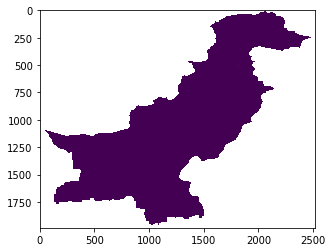

In [78]:
#Load nighttime VIIRS data
filepath_night = 'VIIRS/VIIRS Annual/pak_viirs_median_2016.tif'
data_night = rasterio.open(filepath_night)
array_night = data_night.read()
print('nighttime image shape: {}'.format(array_night.shape))
plt.imshow(data_night.read(1));

In [79]:
array_night.mean()

nan

# Feature Creation
Reshape the data into an array of 3D tensors and normalize each element so that each pixel value is between 0 and 255. Since the Landsat data is an 8-bit data, the minimum and maximum values are 0 and 255 (2⁸ = 256 values).
***  
*Current Assumptions/Parameters*
- data_train, data_test: (np.array) array containing 3D arrays each representing one 8-bit Lansat image
- target_train, target_test: (np.array with elements in range(0,5)) 1D array of nighttime light intensities split into 5 buckets

In [ ]:
# Image Dimensions
channels = 1
height = data_train[0].shape[0]
width = data_train[0].shape[1]

# Reshape the image data into features.
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# Normalize the features
features_train = data_train / 255
features_test = data_test / 255

Each potential label will be an output node in the neural network and so each possible class needs to be mapped to a value for each target label. We perform this operation with a one-hot encoding of the labels.

In [ ]:
# One-Hot Encode Target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1] #should equal to 5

# Build the CNN

In [ ]:
net = Sequential()

# CNN:
# 64 filters
# 5x5 window
# ReLu Activation
net.add(Conv2D(filters=64,
               kernel_size=(5, 5),
               input_shape=(channels, width, height),
               activation='relu'))

# Pooling with a 2x2 window
net.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
net.add(Dropout(0.5))

# Flattening Layer
net.add(Flatten())

# Fully Connected Layer
net.add(Dense(128, activation='relu'))

# Dropout Layer
net.add(Dropout(0.5))

# Fully Connected Layer with softmax.
net.add(Dense(number_of_classes, activation='softmax'))

In [ ]:
#Compiling and training the net, selecting evaluation metric
net.compile(loss="categorical_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

# Run the model
net.fit(features_train, target_train, epochs=2)

# Evaluate the CNN

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Predict for test data 
target_pred = net.predict(features_test)

# Calculate and display the error metrics
confusion_matrix = confusion_matrix(target_test, target_pred)
accuracy = accuracy_score(target_test, target_pred)
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)

sns.heatmap(confusion_matrix, annot=True, fmt='d');